In [7]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [8]:
train = pd.read_csv('ts_PassengerTraffic_Train.csv')
test = pd.read_csv('ts_PassengerTraffic_Test.csv')
print(train.shape)
train.head()

(18288, 3)


,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [9]:
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


In [10]:
# convert object to datetime format
train['Datetime'] = pd.to_datetime(train['Datetime'], format = '%d-%m-%Y %H:%M')
test['Datetime'] = pd.to_datetime(test['Datetime'], format = '%d-%m-%Y %H:%M')
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [11]:
train['hour'] = train['Datetime'].dt.hour
train['YearMonth'] = train['Datetime'].dt.year.astype(str).str.cat(train['Datetime'].dt.month.astype(str), sep='-')
train.head()

,ID,Datetime,Count,hour,YearMonth
0,0,2012-08-25 00:00:00,8,0,2012-8
1,1,2012-08-25 01:00:00,2,1,2012-8
2,2,2012-08-25 02:00:00,6,2,2012-8
3,3,2012-08-25 03:00:00,2,3,2012-8
4,4,2012-08-25 04:00:00,2,4,2012-8


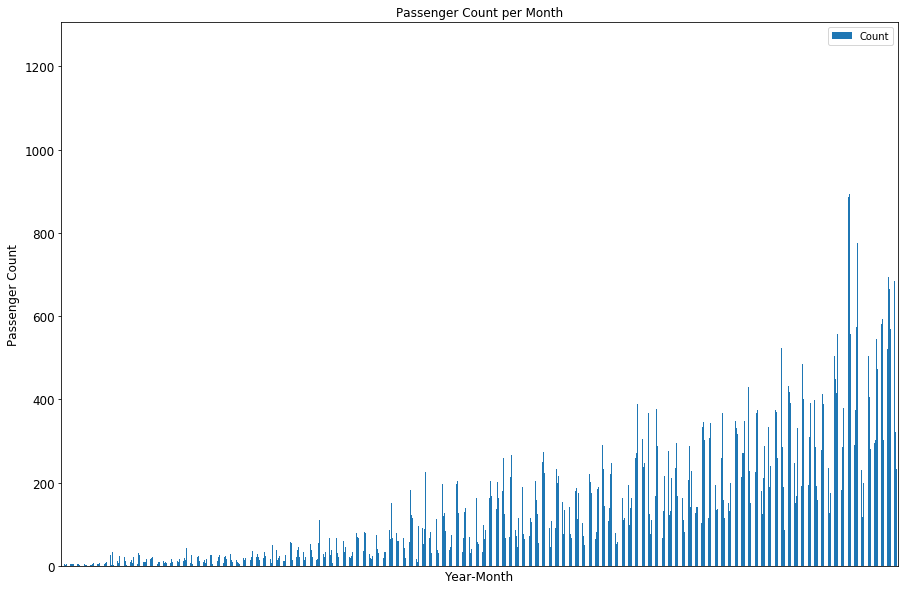

In [40]:
ax = train[['Count', 'YearMonth']].plot(kind='bar', title ="Passenger Count per Month", 
                                        figsize=(15, 10), legend=True, fontsize=12)
ax.set_xlabel("Year-Month", fontsize=12)
ax.set_ylabel("Passenger Count", fontsize=12) 
ax.xaxis.set_major_locator(mdates.YearLocator(1))   # set xticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%y')) 
plt.setp(ax.xaxis.get_majorticklabels())
plt.show()

In [43]:
# The data has so much noise, we can aggregate the data
## hourly average fraction
hourly_frac = train.groupby(['hour']).mean()/np.sum(train.groupby(['hour']).mean())
hourly_frac.head()

,ID,Count
hour,,
0,0.041614,0.044287
1,0.041619,0.035343
2,0.041623,0.029911
3,0.041628,0.024714
4,0.041632,0.020802
